<a href="https://colab.research.google.com/github/KingNam/Hongong_ml_dl/blob/main/3_RegressionAlgorithm_and_Model_Regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K- 최근접 이웃 회귀

회귀(Regression) 란 무엇인가?

지도학습 (Supervised Learning)은 target변수를 예측을 목표로 한다.

target변수가 수치변수이면 회귀를 활용하여 수치를 계산하여 예측하고

target변수가 Categorical 변수면 분류(Classification)를 활용하여 target의 Class를 예측한다.


앞서, K-최근접 이웃 모델을 통해 도미와 빙어의 분류 문제를 해결하였다.

이제는 분류가 아닌 회귀 문제를 해결해보자. 

분류와 가까운 샘플을 찾는 것은 비슷하나 예측값이 다르다.
</br></br>
k - 최근접 이웃 분류 (K-Nearest Neighbors Classification)
 - 새로운 샘플과 가장 가까운 샘플 k개를 선택하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.

k - 최근접 이웃 회귀 (K-Nearest Neighnors Regression)
 - 새로운 샘플과 가장 가까운 샘플 k개를 선택하여 샘플의 수치를 활용하여 (ex. 평균값 계산) 새로운 샘플의 타깃값을 예측한다. 



In [ ]:
import numpy as np

# 훈련 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

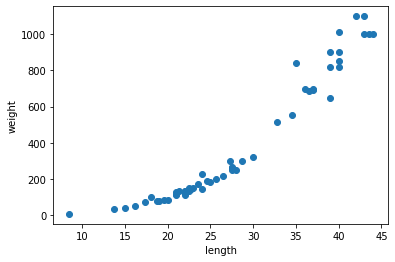

In [ ]:
# 산점도 그려보기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

길이가 늘어남에 따라 무게도 늘어나는 것을 확인


In [ ]:
# 데이터를 train_set 과 Test_set으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

사이킷런에서 사용할 train_set은 2차원 배열이여야 함.

but, 지금 perch_length 와 perch_weight는 1차원 배열.

따라서, 2차원 배열로 바꿔 주어야함

In [ ]:
# reshape 메서드
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# 앞에서 두개씩 잘라 행으로 stack
re_test_array = test_array.reshape(2,2)
print(re_test_array)
print(re_test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [ ]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [ ]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# reshape 함수에서 크기를 -1 로 지정하면 자동으로 숫자를 계산하여 배정해준다.
# 현재 train_input 에는 42개 원소가 1차 배열로 있음

# 2차원으로 주고 -1,1 로 지정하면 -1값은 42로 계산된다.
train_input= train_input.reshape(-1,1)
print(train_input)

# 2차원에 -1, 3 이면 -1 값은 42/3 = 14 가 된다. (14행 3열)
train_input_14_3 = train_input.reshape(-1,3)
print(train_input_14_3)
train_input_14_3_ver2 = train_input.reshape(14,3)
print(train_input_14_3_ver2)

# 3차원에 2,3,-1 이면 -1 값은 (42/2)/3 = 7 이 된다.
train_input_2_3_7 = train_input.reshape(2,3,-1)
print(train_input_2_3_7)
train_input_2_3_7_ver2 = train_input.reshape(2,3,7)
print(train_input_2_3_7_ver2)


In [ ]:
# reshape 함수를 통해 1차원 배열을 42행 1열의 2차원으로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 결정계수 ($R^2$)

$R^2 = 1- \frac{RSS}{TSS}$

RSS(Sum of Squares of Residual): 잔차 제곱합

TSS(Totals of Sum of Squares): 총 제곱합

자세한 설명은 아래링크

[결정계수를 직관적으로 이해하기](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델을 훈련시킴
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# 결정계수를 계산. 분류에서는 정확도
print(knr.score(test_input,test_target))

0.9928094061010639


In [ ]:
# 직접적으로 타깃과 예측한 값 사이의 차이를 구함으로써, 어느정도 예측이 벗어났는지 확인
# mean_absolute_error 함수를 활용해 타깃과 예측값의 절댓값 오차를 평균하여 반환함
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과적으로 예측이 19g 정도 타깃값과 다르다는 것을 알 수 있음.

# 과대적합 vs 과소적합

과대적합(Overfitting): 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁜 경우

과소적합(Underfitting): 훈련세트보다 테스트세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우. 즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

In [ ]:
# 아래의 경우는 test 세트의 점수가 더 높으니, 과소적합
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099255
0.9928094061010639


문제 해결을 위해 모델을 조금 더 복잡하게 만들면 된다.

k-최근접 알고리즘의 복잡도를 높이는 방법은 k의 개수를 줄이는 것이다. 

즉, 새로운 샘플이 들어왔을때 훈련세트에 대한 힌트를 덜 줌으로써 복잡하게 만드는 것. 

반대로 모델의 단순화를 위해서는 k의 개수를 늘린다.


In [ ]:
# 이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.974645996398761


# 선형 회귀

#### KNN의 한계

In [1]:
import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [35]:
from sklearn.model_selection import train_test_split

#훈련세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k - 최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


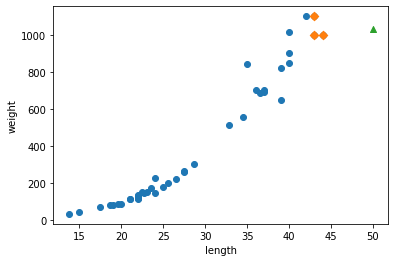

가장 가까운 데이터의 길이는: [[[44.]
  [43.]
  [43.]]]
1033.3333333333333


In [37]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker= 'D')

# 50cm 농어 데이터
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print("가장 가까운 데이터의 길이는:" , train_input[indexes])
print(np.mean(train_target[indexes]))

KNN의 단점은 가장 가까운 점으로만 계산을 해서 새로운 데이터에 대한 예측이 유동적이지 않다.

상식적으로 농어의 length 가 늘어나면 무게도 늘어난다. 

그러나, KNN에서는 길이가 늘어나도 무게에 대한 데이터가 한정적이라 예측값 또한 한정적이다.

예를들어, 길이가 100에 1000kg 짜리 농어와 길이가 70에 2000kg 짜리 농어가 있다고 가정해보자. 

KNN 알고리즘에 의하면 이 두개에 대한 예측값은 둘다 (1000 + 1000 + 1100) / 3 의 값인 1033 이 나온다.

따라서, 지금의 문제는 KNN으로 해결하기 어렵다.

#### 선형 회귀 (linear regression)

데이터 안에서 최적의 직선을 찾는 알고리즘

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

[1241.83860323]


In [39]:
# 이 회귀모델에 대한 계수와 절편은 다음과 같다.
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


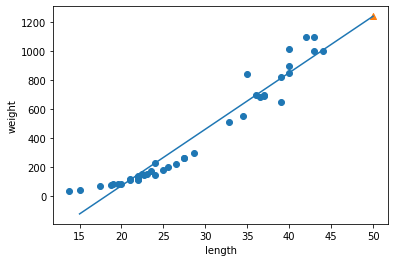

In [40]:
# 회귀 직선 그려보기
plt.scatter(train_input, train_target)
plt.plot([15,50], [ 15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [41]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


위 데이터는 곡선 형태의 데이터를 직선으로 회귀한다고 예측하였기 때문에 과소적합되었다고 볼 수 있다.

현대 데이터를 최적으로 학습시키면 곡선의 방정식이 나와야하는데 위 과정에서는 직선의 방적식이 나오므로 과소적합되었다고 판단할 수 있는 것.


#### 다항 회귀

현재 농어 데이터에서 최적의 곡선을 찾아보자.

$무게 = a \times 길이^2 + b \times 길이 + c$

위와 같은 2차 그래프를 그리려면 길이를 제곱한 항이 train_set에 추가되어야 한다.

In [42]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [45]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [46]:
print(lr.coef_, lr. intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


위 값이 학습된 모델에서 나온 절편

따라서,

$무게 = 1.01 \times 길이^2 - 21.6 \times 길이 + 116.05$ 이다.

이런 회귀식을 다항 회귀(polynomial regression)라고 부른다.

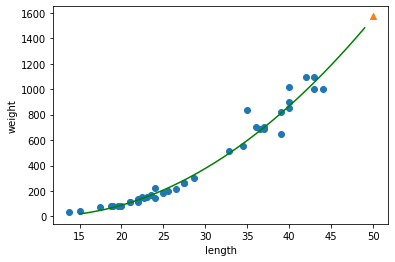

In [55]:
 # 구간별로 직선 그리기
 point = np.arange(15,50)

 # 훈련세트의 산점도를 그린다.
 plt.scatter(train_input, train_target)

 # 2차 방정식의 점을 그린다.
 plt.plot(point, 1.01*point**2 - 21.6*point +116.05, color ='green')

 #50cm 농어 데이터
 plt.scatter(50,1574, marker='^')
 plt.xlabel('length')
 plt.ylabel('weight')
 plt.show()

In [57]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


테스트 score의 값이 0.007정도 더 높은 것으로 보아 아직도 과소적합이 남아 있음이 보인다.

#### 특성 공학과 규제

특성공학 (Featrue Engineering)

기존의 특성을 사용하여 새로은 특성을 뽑아내는 작업

In [59]:
# 데이터 준비
# 인터넷에서 바로 파일을 다운받아서 쓸 수 있는 판다스의 데이터프레임을 활용

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')

In [68]:
# 농어의 길이, 높이, 두께에 대한 데이터가 있음
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
perch_full = df.to_numpy()
print(perch_full)

In [76]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [77]:
# perch_full 데이터를 train,test데이터 input에 
# perch_weight 데이터를 train, test데이터 target에 분할한다

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight,random_state =42 
)

#### 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 변환기라고 부른다.

사이킷런의 모델 클래스에 일관된 fit, score, predict 메서드가 있는 것처럼 
변환기 클래스는 fit, transform메서드를 제공한다.

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [79]:
# PolynomialFeatures의 옵션 include_bias = False로 지정하면 절편 값은 반환하지 않는다.
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [80]:
# 이제 위 방식으로 train_input 데이터에 적용해보자
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [81]:
# get_feature_names() 메서드를 통해 9개의 특성이 각각 어떤 조합으로 만들어졌는지 알려준다.
# x0: length, x1: height, x2: width
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [82]:
# 이제 테스트 데이터를 변환
# 위에서 구한 9개의 피쳐로 변환
test_poly = poly.transform(test_input)

#### 다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련하는 것은 선형 회귀모델을 훈련하는 것과 같다.

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더이상 나타나지 않았다.

그렇다면 단순히 특성의 개수가 늘어나면 이상적인 모델을 완성할 수 있을까?

In [92]:
# PolynomialFeatures의 degree의 매개변수를 사용하여 최대 차수를 지정할 수 있다.
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [93]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


단순히 특성의 개수가 늘어나는 것은 과대적합의 문제를 발생시킬 수 있다.

따라서, 모델을 잘 구슬려서 최적의 값을 찾게 만들어야 한다.

#### 규제 (Regulataion)

머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것.

선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만든다.


In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


선형 회귀 모델에 규제를 추가한 모델을 **릿지(RIdge)** 와 **라쏘(Lasso)** 라고 부릅니다.

릿지는 계수를 **제곱한 값**으로 규제를 적용하고

라쏘는 계수의 **절댓값**을 기준으로 규제를 적용한다.

일반적으로는 릿지를 조금 더 선호한다. 라쏘는 계수의 크기를 아예 0으로 만들 수 있기 떄문.


#### 릿지 회귀

In [96]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


확실히 55개의 특성을 활용했지만 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.



릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.

모델 객체를 만들 떄 alpha 매개변수로 규제의 강도를 조절한다.

alpha 값이 크면 규제 강도가 세지므로 계수 값을 줄이고 과소적합되도록 유도.

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 과대적합될 가능성이 크다.

**하이퍼파라미터**

alpha 값과 같이 모델이 학습해서 계산해내는 값이 아니라 사전에 사람이 지정해야 하는 값. 

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 $R^2$값의 그래프를 그려 보는 것이다.

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [99]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for a in alpha_list:
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

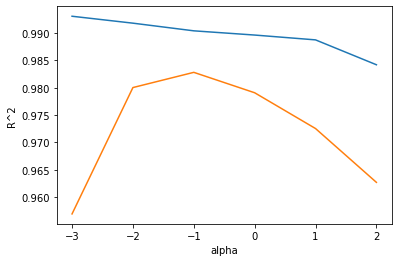

In [103]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

plot 에서 위 그래프는 train 셋. 아래는 test 셋 그래프이다.

이 그래프를 보면 -1 (alpha = 0.1)이 alpha의 최적값이라고 할 수 있다.

In [105]:
# alpha 값을 0.1로 두고 모델 훈련하기
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


#### 릿지 회귀


In [109]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


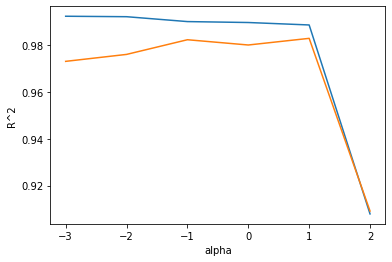

In [111]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for a in alpha_list:
  lasso = Lasso(alpha=a, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

이 그래프에서도 왼쪽은 과대적합을 보여주고 있고, 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다.

라쏘 모델에서의 최적 alpha 값은 10 이다.

In [112]:
# alpha 값을 10로 두고 모델 훈련하기
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [114]:
# 라쏘 모델 중에서 계수의 값이 0 인것을 세보지
print(np.sum(lasso.coef_ ==0 ))

40
